In [4]:
import pandas as pd

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget

In [34]:
logins_df = pd.read_json('./logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
import pandas_profiling
report = pandas_profiling.ProfileReport(logins_df)

In [197]:
report

<font color = 'green'> From the above we can observe the following - 
1. There are no missing rows
2. We have 4 months of data from 1970-01-01 20:12:16 to 1970-04-13 18:57:38
3. Of the total number of rows (93142), 0.9% of data is duplicates (877 rows).
Since this data is of user logins in a particular geographic region, duplicates are ok.
</font>


# Part 1 - Exploratory data analysis


<font color = 'red'>The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them. </font>

In [131]:
logins_df = pd.read_json('./logins.json')

In [132]:
logins_df.describe()

/Users/Amulya/anaconda2/envs/py365/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [133]:
# Sort the login_time values
logins_df['login_time'] = pd.to_datetime(logins_df['login_time']).sort_values()

In [150]:
#Lets add a column count with starting value 1
logins_df['count']=1
logins_df.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [149]:
logins_count= logins_df.set_index('login_time').resample('15T').sum()
logins_count.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='login_time'>

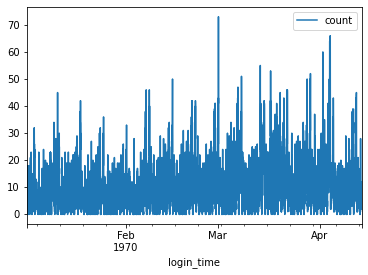

In [156]:
%matplotlib widget
logins_count.plot()

In [175]:
logins_count.index

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15T')

In [167]:
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [193]:
#To display df with index, easier way is to reset_index
lc = logins_count.reset_index()

In [196]:
lc.plot_bokeh(
    kind='line',
    x='login_time',
    y='count',
    xlabel='login_time',
    ylabel='count',
    title='count every 15 mins'
)

Figure(id='1036', ...)

<font color = 'green'> By just hovering over the graph it looks like every 7 days (could be weekends), lot of users login. Since March, more number of users are logging in through out the day(band of spikes). Lets do a further analysis to see why there is more demand every week </font>

In [212]:
(lc['count']).sort_values(ascending=False)[:10]

5602    73
8870    66
8854    64
8853    63
8654    60
8868    60
8869    59
8867    59
8855    56
6825    55
Name: count, dtype: int64

In [213]:
lc[lc['count']>50]

,login_time,count
5602,1970-03-01 04:30:00,73
6275,1970-03-08 04:45:00,51
6825,1970-03-13 22:15:00,55
7126,1970-03-17 01:30:00,53
8291,1970-03-29 04:45:00,52
8654,1970-04-01 23:30:00,60
8850,1970-04-04 00:30:00,53
8852,1970-04-04 01:00:00,54
8853,1970-04-04 01:15:00,63
8854,1970-04-04 01:30:00,64


In [264]:
#Lets aggregate for a day and plot the result
logins_count_days = logins_df.set_index('login_time').resample('D').sum()
logins_count_days.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [265]:
lc_d = logins_count_days.reset_index()
lc_d.plot_bokeh(
    kind='line',
    x='login_time',
    y='count',
    xlabel='login_time',
    ylabel='count',
    title='count every day'
)

Figure(id='2321', ...)

<font color ='green'> By aggregating login counts by the day the graph is more clearer and we see how it drops and increases frequntly and overall login is increasing over time. </font>

In [266]:
(lc_d['count']).sort_values(ascending=False)[:10]

93    1889
72    1706
65    1666
73    1565
87    1523
92    1504
86    1488
79    1485
51    1479
80    1472
Name: count, dtype: int64

In [267]:
lc_d['day'] = lc_d['login_time'].dt.day_name()


In [268]:
lc_d

,login_time,count,day
0,1970-01-01,112,Thursday
1,1970-01-02,681,Friday
2,1970-01-03,793,Saturday
3,1970-01-04,788,Sunday
4,1970-01-05,459,Monday
...,...,...,...
98,1970-04-09,818,Thursday
99,1970-04-10,1009,Friday
100,1970-04-11,1352,Saturday
101,1970-04-12,1409,Sunday


In [276]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
lc_d_agg = lc_d.groupby(lc_d['day']).sum().reindex(days) 
lc_d_agg

,count
day,
Monday,8823
Tuesday,9268
Wednesday,10339
Thursday,11960
Friday,15208
Saturday,19377
Sunday,18167


In [278]:
lc_d_agg = lc_d_agg.reset_index()
lc_d_agg.plot_bokeh(
    kind='bar',
    x='day',
    y='count',
    xlabel='day',
    ylabel='count',
    title='count by day'
)

Figure(id='3144', ...)

<font color='green'> By plotting the number of logins for every day of the week, we see that more people login over the weekend.</font>

# Part 2 ‑ Experiment and metrics design

<font color='red'> The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats. </font>

1. Before we decide on the success metric we might need to find why one city is active during day and other during night.
Why is the demand complemntary?
Is it because of the existence of office/residential neighborhoods/older population in Metropolis and more restaurants, bars and night life in Gotham?
If this is the case, waiving the toll fee might not help in getting the drivers to neighboring city. Drivers exist where there is demand.

Assuming same demographics of people live in both cities and both cities have similar office/shops/residential neighborhood, and reimbursing tolls will help in following -
1. Drivers in both cities can work flexible hours depending on their availability
2. People who were not willing to visit the neighboring city just because of the toll fee, can now visit neighboring city without being charged extra.
3. Higher satisfaction rates amongst drivers and users, leading to more users and induced demand.

<font color = 'green'>For the above assumptions, the measure of success would be increase in number of users and increase in number of rides per day (multiple rides) thereby increase in ride duration. Therefore the success metric would be = ride count. </font>

a. <font color = 'green'> I would implement the experiment by capturing the ride duration, pickup city and drop off city, and checking how the ride count is changing over a period of time(2-3 months depending on how much data we are getting) </font>

b. <font color = 'green'> I would perform an A/B test to check if the experiment is doing good or not.  
Null hypothesis = Number of rides is not affected by reimbursing toll fee
After gathering the data for specific amount of time (depending on the urgency), I would calculate the p-value. If p-value <0.05, I would reject the null hypothesis. There by retaining the reimbursement of toll fee. </font>
    
c. <font color = 'green'> If the p value is < 0.05, I would ask Ultimate technologies to keep reimbursing toll fee as long as they are profitable. If the cross city rides and total ride counts do not increase enough and the company forecasts loss, they can approach the city operations team to lower or remove the toll fee. They can also ask the city operations team to give some discounts for ultimate technologies.</font>